In [1]:
!pip install autogluon --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.4/382.4 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.6 MB/s eta 0:0

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from autogluon.tabular import TabularPredictor


In [3]:
# 2. Load Dataset
df = pd.read_csv("optimized_hair_loss.csv")

In [4]:
# 3. Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   total_protein  total_keratine  hair_texture  vitamin  manganese  iron  \
0            271             188            32       29        308   487   
1            130             113            15      277        193   372   
2            316             282            25      225        351    20   
3            127             495            89      366        290   232   
4            243             321            71      277        221    25   

   calcium  body_water_content  stress_level  liver_data  hair_fall  
0       65                  72            47         215          5  
1      452                  98            54          77          5  
2      255                   6            93          28          5  
3      235                  42            80         177          2  
4      173                  81            36          26          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17041 entries, 0 to 17040
Data columns (total 11 columns):
 #   Column   

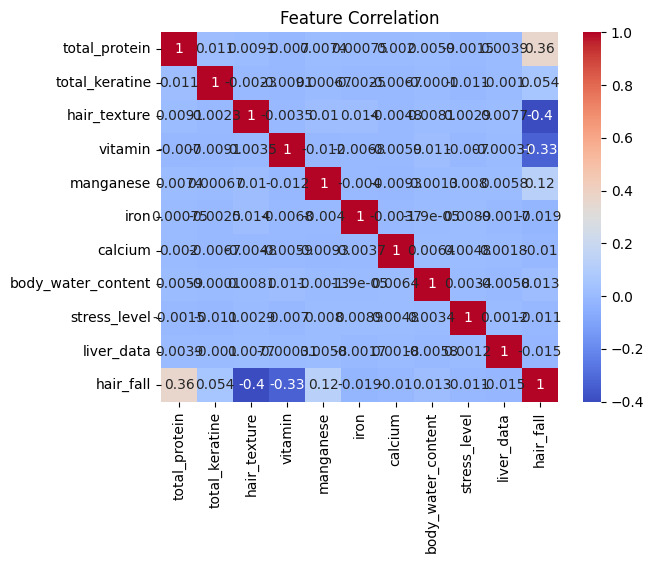

In [5]:
# 4. Data Visualization (Correlation + Cluster Visualization)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

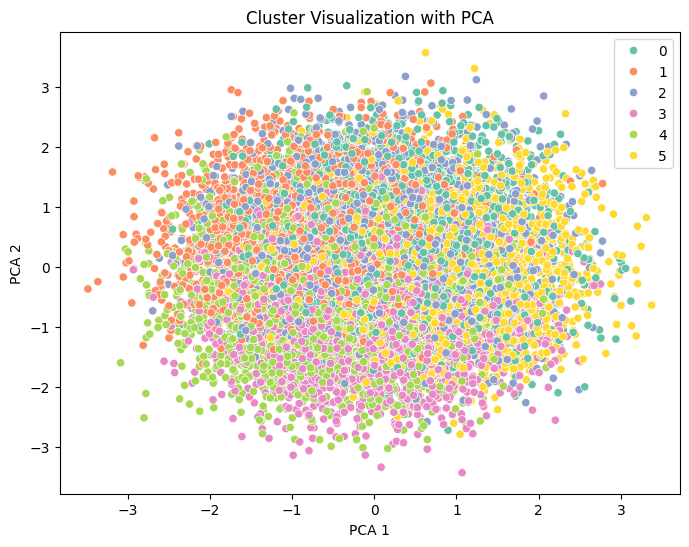

In [6]:
# PCA + KMeans for Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X_viz = df.drop("hair_fall", axis=1)
scaler_viz = StandardScaler()
X_scaled_viz = scaler_viz.fit_transform(X_viz)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_viz)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_viz)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette="Set2")
plt.title("Cluster Visualization with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [7]:
# 5. Data Preprocessing
X = df.drop("hair_fall", axis=1)
y = df["hair_fall"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# 6. Train Traditional ML Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc}")
    print(classification_report(y_test, preds))



Random Forest Accuracy: 0.9166911117629803
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       575
           2       0.93      0.93      0.93      1120
           3       0.91      0.92      0.92       555
           5       0.91      0.93      0.92      1159

    accuracy                           0.92      3409
   macro avg       0.92      0.91      0.91      3409
weighted avg       0.92      0.92      0.92      3409


Gradient Boosting Accuracy: 0.8985039601056029
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       575
           2       0.90      0.90      0.90      1120
           3       0.92      0.90      0.91       555
           5       0.88      0.91      0.90      1159

    accuracy                           0.90      3409
   macro avg       0.90      0.90      0.90      3409
weighted avg       0.90      0.90      0.90      3409


SVM Accuracy: 0.9419184511586975
    

In [9]:
# 7. AutoGluon for Advanced Models

df.to_csv("hairfall_data.csv", index=False)
predictor = TabularPredictor(label="hair_fall").fit("hairfall_data.csv", time_limit=600)
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard)

No path specified. Models will be saved in: "AutogluonModels/ag-20250527_061814"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.99 GB / 12.67 GB (86.7%)
Disk Space Avail:   65.46 GB / 107.72 GB (60.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

                  model  score_val eval_metric  pred_time_val   fit_time  \
0   WeightedEnsemble_L2   0.985924    accuracy       0.051232  84.747635   
1        NeuralNetTorch   0.982991    accuracy       0.010847  65.744730   
2       NeuralNetFastAI   0.981818    accuracy       0.039303  18.793844   
3              CatBoost   0.963636    accuracy       0.005964  18.749828   
4            LightGBMXT   0.961877    accuracy       0.463042  11.046069   
5              LightGBM   0.950147    accuracy       0.246671   6.460568   
6               XGBoost   0.945455    accuracy       0.565471  18.844926   
7         LightGBMLarge   0.943109    accuracy       0.646429  16.235911   
8        ExtraTreesGini   0.927273    accuracy       0.155754   3.444264   
9        ExtraTreesEntr   0.924927    accuracy       0.279824   3.957743   
10     RandomForestGini   0.923167    accuracy       0.161721   8.574255   
11     RandomForestEntr   0.921994    accuracy       0.125539  11.590561   
12       KNe

In [10]:
# 8. Save Best Traditional Model (e.g., Random Forest if highest accuracy)
best_model = RandomForestClassifier()
best_model.fit(X, y)
joblib.dump(best_model, "best_traditional_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [11]:
# 9. Test Prediction - Traditional Model
sample_input = np.array([[271, 188, 32, 29, 308, 487, 65, 72, 47, 215]])
scaler_loaded = joblib.load("scaler.pkl")
best_model_loaded = joblib.load("best_traditional_model.pkl")
sample_scaled = scaler_loaded.transform(sample_input)
pred = best_model_loaded.predict(sample_scaled)
print("Predicted Hair Fall Stage (Traditional):", pred[0])


Predicted Hair Fall Stage (Traditional): 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [13]:
# Display path where all models are stored
predictor.path


'/content/AutogluonModels/ag-20250527_061814'

In [14]:
import shutil
shutil.make_archive("autogluon_models", 'zip', predictor.path)


'/content/autogluon_models.zip'

In [15]:
from google.colab import files
files.download("autogluon_models.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
sample_dict = {
    "total_protein": 271,
    "total_keratine": 188,
    "hair_texture": 32,
    "vitamin": 29,
    "manganese": 308,
    "iron": 487,
    "calcium": 65,
    "body_water_content": 72,
    "stress_level": 479,
    "liver_data": 215
}

sample_df = pd.DataFrame([sample_dict])
auto_pred = predictor.predict(sample_df)
print("Predicted Hair Fall Stage (AutoGluon):", auto_pred.values[0])


Predicted Hair Fall Stage (AutoGluon): 5
